<a href="https://colab.research.google.com/github/abdinegara783/ML-Mentoring-Platform-Dicoding/blob/main/coba_feedback_2_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('new_feedback.csv')
df.head()

,teaching,teaching.1,Rating
0,0,teacher are punctual but they should also give...,Bad
1,1,Good,Good
2,1,Excellent lectures are delivered by teachers a...,Good
3,1,Good,Good
4,1,teachers give us all the information required ...,Good


In [ ]:
# Membuat kolom baru 'Rating' dengan nilai awal kosong
df['positively_rated'] = ""

# Fungsi untuk menentukan nilai Rating berdasarkan nilai feedback
def get_path(feedback):
    if feedback == 1:
        return 1
    else:
        return 0


# Mengisi nilai pada kolom 'Raing' berdasarkan nilai pada kolom 'teaching'
df['positively_rated'] = df['teaching'].apply(get_path)
df.head()

,teaching,teaching.1,Rating,positively_rated
0,0,teacher are punctual but they should also give...,Bad,0
1,1,Good,Good,1
2,1,Excellent lectures are delivered by teachers a...,Good,1
3,1,Good,Good,1
4,1,teachers give us all the information required ...,Good,1


In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['teaching.1'], df['positively_rated'], random_state=0)

print('X_train first entry:\n\n', X_train.iloc[2])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 not bad..


X_train shape:  (138,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer()
X_train_vec = vect.fit_transform(X_train)


In [ ]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
print('Shape of matrix', X_train_vectorized.shape)
print(X_train_vectorized.toarray()[2])

Shape of matrix (138, 316)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
# Train the model
model = LogisticRegression()

model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

AUC:  0.7594594594594595


Text(0.5, 0, 'False Positive Rate')

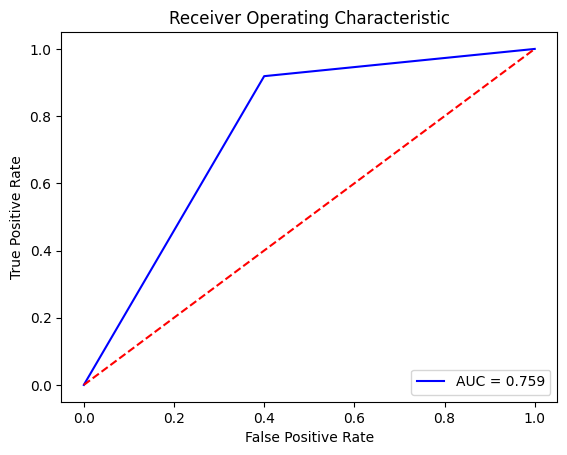

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5; 
# you can play with it and see how accuracy changes 
vect_tf = TfidfVectorizer(min_df=5).fit(X_train)

In [ ]:
X_train_vectorized_tf = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized_tf, y_train)
predictions_tf = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions_tf))

AUC:  0.7594594594594595


In [ ]:
# These reviews are treated the same by our current model
print(model.predict(vect.transform(['Mentor explained to slow and not efficient', 'I think the mentor explained the materials so bad'])))

[0 1]


In [ ]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.7594594594594595


Text(0.5, 0, 'False Positive Rate')

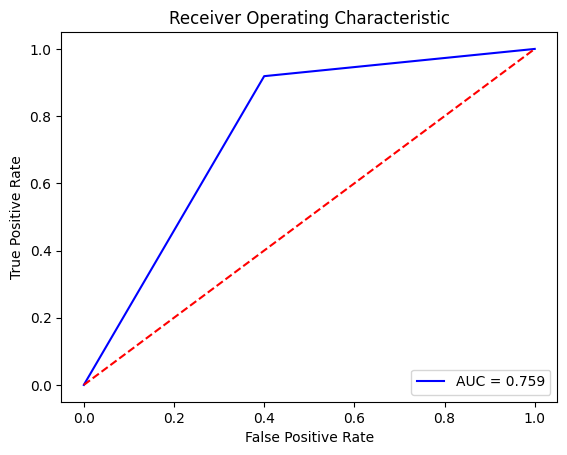

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
print(model.predict(vect.transform(["The mentor was unresponsive and didn't provide any helpful guidance. I felt ignored and frustrated throughout the mentorship program.",
                "I found the mentor's teaching style to be confusing and ineffective. The explanations were unclear, and I struggled to understand the concepts."])))

[0 0]


In [ ]:
# Try a random review but be sure the words belongs to document term matrix or dictionary built from training set!
print(model.predict(vect.transform(["The mentor was unresponsive and didn't provide any helpful guidance. I felt ignored and frustrated throughout the mentorship program.",
                "I found the mentor's teaching style to be confusing and ineffective. The explanations were unclear, and I struggled to understand the concepts.",
                "The mentor lacked patience and seemed uninterested in helping me. I felt rushed and discouraged whenever I asked questions.",
                "The mentor didn't provide timely feedback on my work. It took days or even weeks to receive any response, which hindered my progress.",
                "I had high expectations for the mentor, but unfortunately, they didn't meet them. Their knowledge on the subject matter was limited, and I didn't gain much from the mentorship."])))

[0 0 1 1 0]


In [ ]:
print(model.predict(vect.transform(["Thank you for being an amazing mentor. Your guidance and support have truly helped me grow both personally and professionally.",
"I appreciate your patience and willingness to answer all my questions. You have made the learning process much easier for me.",
"I'm grateful for your constructive feedback. It has helped me identify my strengths and areas for improvement.",
"You have a remarkable ability to explain complex concepts in a simple and understandable manner. It has made a significant difference in my understanding.",
"Your passion for your work is contagious. It has inspired me to pursue my goals with even more enthusiasm.",
"Thank you for always making time for our mentoring sessions. Your availability and dedication have made me feel valued and supported.",
"Your mentorship has not only provided me with valuable skills but also boosted my confidence. I now believe in my abilities more than ever.",
"I appreciate your honesty and directness. Your feedback has helped me develop a stronger sense of self-awareness.",
"You have a talent for identifying and nurturing potential. I'm grateful to have you as a mentor, guiding me towards my full potential.",
"Your guidance has had a profound impact on my professional development. I am excited to continue learning and growing under your mentorship."])))

[1 1 1 1 1 1 0 1 1 1]


In [ ]:
print(model.predict(vect.transform(["I feel like you don't really listen to my concerns or take them seriously. It's frustrating and makes me question the value of our mentoring relationship.",
"Your feedback is often vague and unhelpful. I need more specific guidance to understand how to improve.",
"I find it difficult to reach you when I need assistance. It feels like you're not fully committed to our mentoring agreement.",
"Your communication style is condescending and demotivating. It makes me hesitant to ask questions or seek your guidance.",
"You don't seem to have a clear plan or structure for our mentoring sessions. It feels like we're just going through the motions without any real progress.",
"I've noticed that you often cancel or reschedule our sessions at the last minute. It's disrespectful of my time and shows a lack of commitment.",
"Your expectations are unrealistic and unattainable. It's discouraging to constantly feel like I'm falling short.",
"I've asked for specific resources or materials multiple times, but you have failed to provide them. It hampers my learning and growth.",
"I feel like you prioritize other mentees over me. It's disheartening to not receive the same level of attention and support.",
"Your mentoring style is too hands-off. I need more guidance and direction to truly benefit from our mentoring relationship."])))

[1 0 1 1 1 1 1 0 0 1]


# CARA LAIN 1

In [ ]:
df.head()

,teaching,teaching.1,Rating,positively_rated
0,0,teacher are punctual but they should also give...,Bad,0
1,1,Good,Good,1
2,1,Excellent lectures are delivered by teachers a...,Good,1
3,1,Good,Good,1
4,1,teachers give us all the information required ...,Good,1


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Memisahkan fitur dan label
X = df["teaching.1"]
y = df["positively_rated"]

# Ekstraksi fitur TF-IDF
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# Memisahkan data training dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

# Inisialisasi model
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)

# Melatih model
classifier.fit(X_train, y_train)

# Menguji model pada data uji
y_pred = classifier.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 86.49%


### TEST DATA BAIK

In [ ]:
# Data baru untuk pengujian
new_data = [
    "Thank you for being an amazing mentor. Your guidance and support have truly helped me grow both personally and professionally.",
"I appreciate your patience and willingness to answer all my questions. You have made the learning process much easier for me.",
"I'm grateful for your constructive feedback. It has helped me identify my strengths and areas for improvement.",
"You have a remarkable ability to explain complex concepts in a simple and understandable manner. It has made a significant difference in my understanding.",
"Your passion for your work is contagious. It has inspired me to pursue my goals with even more enthusiasm.",
"Thank you for always making time for our mentoring sessions. Your availability and dedication have made me feel valued and supported.",
"Your mentorship has not only provided me with valuable skills but also boosted my confidence. I now believe in my abilities more than ever.",
"I appreciate your honesty and directness. Your feedback has helped me develop a stronger sense of self-awareness.",
"You have a talent for identifying and nurturing potential. I'm grateful to have you as a mentor, guiding me towards my full potential.",
"Your guidance has had a profound impact on my professional development. I am excited to continue learning and growing under your mentorship."
]

# Ekstraksi fitur TF-IDF pada data baru
new_data_transformed = vectorizer.transform(new_data)

# Melakukan prediksi pada data baru
new_data_pred = classifier.predict(new_data_transformed)

# Cetak hasil prediksi
for data, pred in zip(new_data, new_data_pred):
    sentiment = "positive" if pred == 1 else "negative"
    print("Teks:", data)
    print("Sentimen:", sentiment)
    print()

Teks: Thank you for being an amazing mentor. Your guidance and support have truly helped me grow both personally and professionally.
Sentimen: positive

Teks: I appreciate your patience and willingness to answer all my questions. You have made the learning process much easier for me.
Sentimen: positive

Teks: I'm grateful for your constructive feedback. It has helped me identify my strengths and areas for improvement.
Sentimen: positive

Teks: You have a remarkable ability to explain complex concepts in a simple and understandable manner. It has made a significant difference in my understanding.
Sentimen: positive

Teks: Your passion for your work is contagious. It has inspired me to pursue my goals with even more enthusiasm.
Sentimen: positive

Teks: Thank you for always making time for our mentoring sessions. Your availability and dedication have made me feel valued and supported.
Sentimen: positive

Teks: Your mentorship has not only provided me with valuable skills but also boosted

### TEST DATA BURUK

In [ ]:
new_data = [
    "The mentor was unhelpful and lacked knowledge in the subject area.",
"I found the mentor's explanations to be confusing and unclear.",
"The mentor was often unavailable and unresponsive to my questions.",
"I felt neglected by the mentor as they showed favoritism towards other students.",
"The mentor provided minimal feedback and did not offer any guidance for improvement.",
"I was disappointed with the mentor's constant cancellations and rescheduling of sessions.",
"The mentor seemed disinterested and unenthusiastic during our mentoring sessions.",
"I found the mentor to be impatient and easily frustrated when I asked for help.",
"The mentor did not create a supportive and inclusive learning environment for all students.",
"The mentor's knowledge and information were outdated, providing little value in the sessions."
]

# Ekstraksi fitur TF-IDF pada data baru
new_data_transformed = vectorizer.transform(new_data)

# Melakukan prediksi pada data baru
new_data_pred = classifier.predict(new_data_transformed)

# Cetak hasil prediksi
for data, pred in zip(new_data, new_data_pred):
    sentiment = "positive" if pred == 1 else "negative"
    print("Teks:", data)
    print("Sentimen:", sentiment)
    print()

Teks: The mentor was unhelpful and lacked knowledge in the subject area.
Sentimen: positive

Teks: I found the mentor's explanations to be confusing and unclear.
Sentimen: positive

Teks: The mentor was often unavailable and unresponsive to my questions.
Sentimen: positive

Teks: I felt neglected by the mentor as they showed favoritism towards other students.
Sentimen: positive

Teks: The mentor provided minimal feedback and did not offer any guidance for improvement.
Sentimen: positive

Teks: I was disappointed with the mentor's constant cancellations and rescheduling of sessions.
Sentimen: positive

Teks: The mentor seemed disinterested and unenthusiastic during our mentoring sessions.
Sentimen: positive

Teks: I found the mentor to be impatient and easily frustrated when I asked for help.
Sentimen: positive

Teks: The mentor did not create a supportive and inclusive learning environment for all students.
Sentimen: positive

Teks: The mentor's knowledge and information were outdated,

### TEST DATA BAIK KE 2

In [ ]:
# Data baru untuk pengujian
new_data = [
    "The mentor was extremely knowledgeable and provided thorough explanations.",
"I appreciated the mentor's responsiveness and willingness to assist whenever I had questions.",
"The mentor's guidance and support greatly contributed to my understanding of the subject.",
"I felt valued and supported by the mentor, as they treated all students equally.",
"The mentor provided constructive feedback that helped me improve my skills and knowledge.",
"I was impressed by the mentor's punctuality and commitment to our mentoring sessions.",
"The mentor's enthusiasm and passion for the subject were contagious and inspiring.",
"I found the mentor to be patient and understanding, even when I struggled with complex topics.",
"The mentor fostered a positive and inclusive learning environment for all students.",
"The mentor stayed up-to-date with the latest developments, providing relevant and current information."
]

# Ekstraksi fitur TF-IDF pada data baru
new_data_transformed = vectorizer.transform(new_data)

# Melakukan prediksi pada data baru
new_data_pred = classifier.predict(new_data_transformed)

# Cetak hasil prediksi
for data, pred in zip(new_data, new_data_pred):
    sentiment = "positive" if pred == 1 else "negative"
    print("Teks:", data)
    print("Sentimen:", sentiment)
    print()

Teks: The mentor was extremely knowledgeable and provided thorough explanations.
Sentimen: positive

Teks: I appreciated the mentor's responsiveness and willingness to assist whenever I had questions.
Sentimen: positive

Teks: The mentor's guidance and support greatly contributed to my understanding of the subject.
Sentimen: positive

Teks: I felt valued and supported by the mentor, as they treated all students equally.
Sentimen: positive

Teks: The mentor provided constructive feedback that helped me improve my skills and knowledge.
Sentimen: positive

Teks: I was impressed by the mentor's punctuality and commitment to our mentoring sessions.
Sentimen: positive

Teks: The mentor's enthusiasm and passion for the subject were contagious and inspiring.
Sentimen: positive

Teks: I found the mentor to be patient and understanding, even when I struggled with complex topics.
Sentimen: positive

Teks: The mentor fostered a positive and inclusive learning environment for all students.
Sentimen

### TEST DATA BURUK KE 2

In [ ]:
new_data = [
    "Your explanations are confusing and unclear, making it difficult for students to grasp the concepts.",
"You show little enthusiasm or passion for the subject, which affects students' motivation to learn.",
"Your teaching methods are outdated and fail to engage students in active learning.",
"You often overlook individual student needs and struggle to provide personalized guidance.",
"Your classroom management skills are lacking, leading to a disruptive and chaotic learning environment.",
"You frequently use inappropriate language or make offensive remarks, creating an uncomfortable atmosphere for students.",
"Your organization and planning skills are poor, resulting in a disorganized curriculum and missed learning opportunities.",
"You rarely give constructive feedback, leaving students unsure about their progress and how to improve.",
"You have a tendency to favor certain students, neglecting others and creating an unfair learning environment.",
"Your lack of availability and accessibility outside of class makes it difficult for students to seek additional help or clarification."]

# Ekstraksi fitur TF-IDF pada data baru
new_data_transformed = vectorizer.transform(new_data)

# Melakukan prediksi pada data baru
new_data_pred = classifier.predict(new_data_transformed)

# Cetak hasil prediksi
for data, pred in zip(new_data, new_data_pred):
    sentiment = "positive" if pred == 1 else "negative"
    print("Teks:", data)
    print("Sentimen:", sentiment)
    print()

Teks: Your explanations are confusing and unclear, making it difficult for students to grasp the concepts.
Sentimen: positive

Teks: You show little enthusiasm or passion for the subject, which affects students' motivation to learn.
Sentimen: positive

Teks: Your teaching methods are outdated and fail to engage students in active learning.
Sentimen: positive

Teks: You often overlook individual student needs and struggle to provide personalized guidance.
Sentimen: positive

Teks: Your classroom management skills are lacking, leading to a disruptive and chaotic learning environment.
Sentimen: positive

Teks: You frequently use inappropriate language or make offensive remarks, creating an uncomfortable atmosphere for students.
Sentimen: positive

Teks: Your organization and planning skills are poor, resulting in a disorganized curriculum and missed learning opportunities.
Sentimen: positive

Teks: You rarely give constructive feedback, leaving students unsure about their progress and how

### TEST CAMPURAN

In [ ]:
new_data = [
    
"Your classroom management skills are lacking, leading to a disruptive and chaotic learning environment."
    ]

# Ekstraksi fitur TF-IDF pada data baru
new_data_transformed = vectorizer.transform(new_data)

# Melakukan prediksi pada data baru
new_data_pred = classifier.predict(new_data_transformed)

# Cetak hasil prediksi
for data, pred in zip(new_data, new_data_pred):
    sentiment = "positive" if pred == 'Good' else "negative"
    print("Teks:", data)
    print("Sentimen:", sentiment)
    print()

Teks: Your classroom management skills are lacking, leading to a disruptive and chaotic learning environment.
Sentimen: negative

